# Приоритизация гипотез и анализ результатов A/B-теста

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Описание данных

<b>Данные для приоритизации гипотез</b>

<b>hypothesis.csv:</b>
<br>Hypothesis — краткое описание гипотезы
<br>Reach — охват пользователей по 10-балльной шкале
<br>Impact — влияние на пользователей по 10-балльной шкале
<br>Confidence — уверенность в гипотезе по 10-балльной шкале
<br>Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

<b>Данные для анализа результатов A/B-теста</b>

<b>orders.csv:</b>
<br>transactionId — идентификатор заказа
<br>visitorId — идентификатор пользователя, совершившего заказ
<br>date — дата, когда был совершён заказ
<br>revenue — выручка заказа
<br>group — группа A/B-теста, в которую попал заказ

<b>visitors.csv:</b>
<br>date — дата
<br>group — группа A/B-теста
<br>visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<br><b>Цели исследования</b>:
1. Приоритизация гипотез
- Применить фреймворк ICE для приоритизации гипотез
- Применить фреймворк RICE для приоритизации гипотез
- Сравнить приоритизацию гипотез при применении RICE и ICE
2. Анализ результатов A/B-теста
- Посчитать кумулятивные метрики
- Построить гистограммы и точечные графики по метрикам
- Определить аномалии в метриках
- Рассчитать статистическую значимость различий в метриках по "сырым" данным
- Рассчитать статистическую значимость различий в метриках по "очищенным" данным
- Принять решение по результатам A/B-теста

<br><b>Ход исследования</b>:
1. Приоритизация гипотез
- Импорт библиотек и изучение данных
- Применение фреймворка ICE
- Применение фреймворка RICE
- Сравнение приоритизации гипотез при применении RICE и ICE
- Вывод
2. Анализ результатов A/B-теста
- Обзор и изучение данных
- Предобработка данных
- Построение графика кумулятивной выручки по группам
- Построение графика кумулятивного среднего чека по группам
- Построение графика относительного изменения кумулятивного среднего чека группы B к группе A
- Построение графика кумулятивного среднего количества заказов на посетителя по группам
- Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
- Построение точечного графика количества заказов по пользователям
- Расчёт 95-го и 99-го перцентилей количества заказов на пользователя и определение аномальных пользователей
- Построение точечного графика стоимостей заказов
- Расчёт 95-го и 99-го перцентилей стоимости заказов и определение аномальных заказов
- Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным
- Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным
- Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
- Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным
- Принятие решения по результатам A/B-теста
3. Вывод

## Приоритизация гипотез

### Импорт библиотек и изучение данных

In [1]:
import pandas as pd # импортируем библиотеку pandas
import matplotlib.pyplot as plt # импортируем из библиотеки 'matplotlib' модуль 'pyplot'
import numpy as np # импортируем библиотеку 'numpy'
from scipy import stats # импортируем из библиотеки 'scipy' модуль 'stats'
import datetime as dt # импортируем модуль 'datetime'
from pandas.plotting import register_matplotlib_converters # импортируем из библиотеки 'pandas.plotting' модуль 'register_matplotlib_converters'
from pylab import rcParams # импортируем из библиотеки 'pylab' модуль 'rcParams'

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

rcParams['figure.figsize'] = 12, 5 # изменим дефолтный размер графиков
%config InlineBackend.figure_format = 'svg' # графики в svg выглядят более четкими
plt.style.use('fast') # установим стиль графиков из библиотеки 'matplotlib'

# прочитаем csv файл и добавим обработчик ошибок в случае неудачного чтения файла
hypothesis = pd.read_csv('hypothesis.csv')

pd.set_option('display.max_columns', None) # уберём ограничение на вывод столбцов на экран

In [2]:
display(hypothesis) # выведем таблицу на экран

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info(verbose=True) # изучим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице нет аномалий, пропусков, дубликатов. Также типы данных в столбцах корректны.

### Применение фреймворка ICE

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
    
display(hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)
                                         .style.set_properties(subset=['Hypothesis'], **{'width': '300px'})
                                               .format({'ICE': '{:.1f}'})
       ) # выведем на экран таблицу 'hypothesis', отсортировав по убыванию значений в столбце 'ICE'

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Применение фреймворка RICE

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
    
display(hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False)
                                          .style.set_properties(subset=['Hypothesis'], **{'width': '300px'})
                                                .format({'RICE': '{:.1f}'})
       ) # выведем на экран таблицу 'hypothesis', отсортировав по убыванию значений в столбце 'RICE'

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Сравнение приоритизации гипотез при применении RICE и ICE

<b>Топ-3 гипотезы при приоритизации фреймворком "ICE":</b>
<br>1. Запустить акцию, дающую скидку на товар в день рождения
<br>2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
<br>3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

<b>Топ-3 гипотезы при приоритизации фреймворком "RICE":</b>
<br>1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
<br>2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
<br>3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

<b>Сравнение фреймворка "RICE" с "ICE":</b>
- Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" поднялась с 3-го на 1-ое место
- Гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" поднялась с 5-го на 2-ое место
- Гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" упала со 2-го на 3-е место

Приоритизация гипотез при использовании фреймворка "RICE" вместо "ICE" изменилась, так как "RICE" учитывает дополнительный параметр "Reach" - скольких пользователей затронет изменение, которое мы хотим внести.

### Вывод

Будем использовать приоритизацию фреймворком "RICE", так как он учитывает большее количество параметров.
<br>В первую очередь проверим гипотезу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Далее "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

## Анализ результатов A/B теста

###  Обзор и изучение данных

In [6]:
# прочитаем csv файлы и добавим обработчик ошибок в случае неудачного чтения файлов
orders, visitors = (pd.read_csv('orders.csv'),
                    pd.read_csv('visitors.csv'))

In [7]:
display(orders.head(15)) # выведем 15 строк таблицы 'orders' на экран

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [8]:
orders.info(verbose=True) # изучим общую информацию о данных таблицы 'orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
display(visitors.head(15)) # выведем 15 строк таблицы 'visitors' на экран

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [10]:
visitors.info(verbose=True) # изучим общую информацию о данных таблицы 'orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблицах нет пропусков. Далее проверим наличие аномалий, явных дубликатов и типы данных.

### Поиск и обработка аномалий

Проверим не попадают ли какие-либо пользователи в обе группы A/B-теста.

In [11]:
duplicate_visitors = orders[orders.duplicated(['visitorId'], keep=False)] # найдём все дубликаты по столбцу 'visitorId'
duplicate_visitors_group = duplicate_visitors.groupby('visitorId').nunique().sort_values('group')['group'] # найдём кол-во групп
# у каждого посетителя
visitors_to_delete = duplicate_visitors_group[duplicate_visitors_group == 2] # оставим только тех посетителей, которые
# состоят в обоих группах
visitors_to_delete = list(visitors_to_delete.index)

In [12]:
duplicate_visitors_group

visitorId
1637811943    1
2742574263    1
3469608676    1
1772171838    1
3379260072    1
             ..
1738359350    2
1668030113    2
1648269707    2
2044997962    2
4266935830    2
Name: group, Length: 94, dtype: int64

In [13]:
orders = orders.query("visitorId != @visitors_to_delete") # удалим из таблицы 'orders' пользователей, которые состоят
# в обоих группах одновременно
orders.info() # посмотрим как изменился датафрейм 'orders'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1016 non-null   int64 
 1   visitorId      1016 non-null   int64 
 2   date           1016 non-null   object
 3   revenue        1016 non-null   int64 
 4   group          1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


### Поиск и обработка явных дубликатов

In [14]:
print(orders.duplicated().sum(), visitors.duplicated().sum()) # поиск явных дубликатов

0 0


Явных дубликатов не выявлено.

 Типы данных в таблицах "orders" и "visitors" в столбцах "date" некорректны. Изменим типы данных в этих столбцах.

### Преобразование типов данных

In [15]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
) # изменим тип данных на 'datetime'

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
) # изменим тип данных на 'datetime'

In [16]:
# проверим изменились ли типы данных
print('"orders":')
orders.info(verbose=True)
print()
print('"visitors":')
visitors.info(verbose=True)

"orders":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB

"visitors":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Теперь типы данных в таблицах "orders" и "visitors" в столбцах "date" корректны.

### Построение графика кумулятивной выручки по группам

Чтобы исключить проблему подсматривания, анализируют графики метрик.
<br>Изучают графики кумулятивных, или накапливаемых данных. Например, тест шёл 14 дней. Если построить график по кумулятивным данным, в точке первого дня будут значения метрик за этот день, в точке второго дня — набор метрик за два дня, в точке третьего — набор за три. Так отслеживают изменения результатов эксперимента на каждый день тестирования. 
<br>По центральной предельной теореме значение кумулятивных метрик часто сходится и устанавливается около некоторого среднего. Тогда по графику кумулятивных метрик определяют, стоит останавливать тест или нет.

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 
- date — дата
- group — группа A/B-теста (A или B)
- orders — кумулятивное количество заказов на указанную дату в указанной группе
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек)
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе

<br>Перед этим создадим массив уникальных пар значений дат и групп теста методом drop_duplicates().

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Далее соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 
<br>Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups:
<br><b>orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]</b>.
<br>Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:
<br><b>.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'})</b>.
<br>Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group': 

In [18]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Этот код работает так, будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы ordersAggregated. 
<br>Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [19]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов.

In [20]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Проверим корректно ли был создан датафрейм "CumulativeDate". Для этого узнаем совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных.

In [21]:
print(cumulativeData['date'].min() == orders['date'].min(), cumulativeData['date'].max() == orders['date'].max())

True True


Собрали все нужные кумулятивные данные. Далее построим график кумулятивной выручки по дням и группам A/B-тестирования.

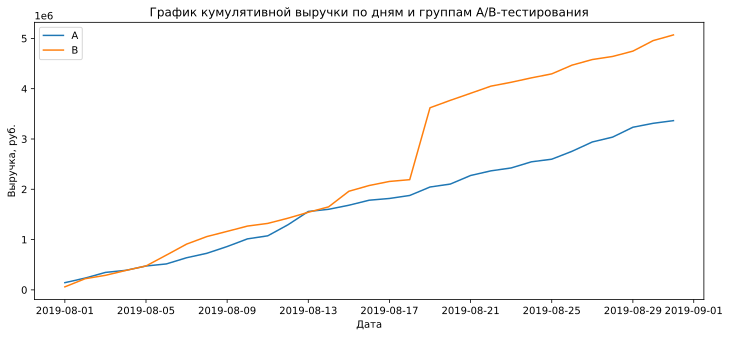

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка, руб.')
plt.legend();

В середине теста сегмент В вырвался вперёд и продолжал лидировать весь остаток теста. Возможно, влияют на результаты аномально большие заказы или резкое увеличение количества заказов. При заключительном анализе удалим выбросы.

### Построение графика кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

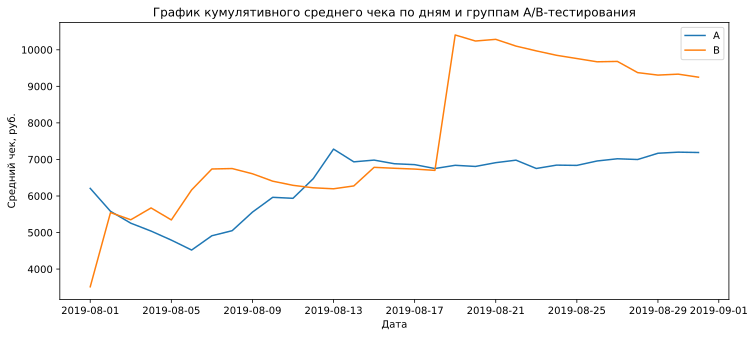

In [23]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')
plt.legend();

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека.
<br>Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»).

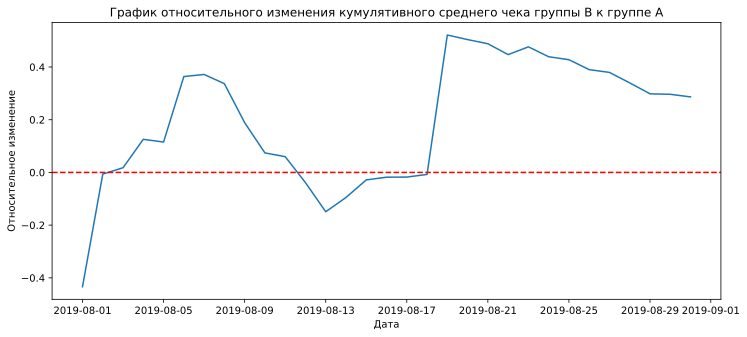

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--');

Построили график относительного различия в среднем чеке между
группами. Результаты теста значительно и резко менялись в несколько дат. Видимо,
именно тогда были совершены аномально большие заказы.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам

Аналогично проанализируем график кумулятивного среднего количества заказов на посетителя.
<br>Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y.

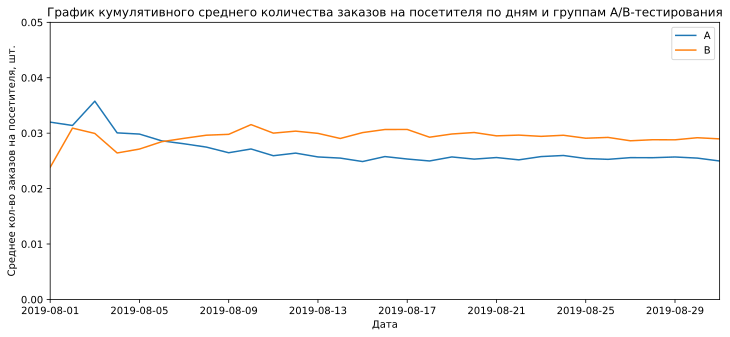

In [25]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя, шт.')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05]);

В начале теста сегмент А имел большее среднее количество заказов на посетителя, но постепенно сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А.
Масштаб графика изменили, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не более 1%. Потому, если убрать масштаб осей, будет казаться, что колебания продолжаются, и среднее количество заказов на посетителя не установилась около своего среднего значения.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя.

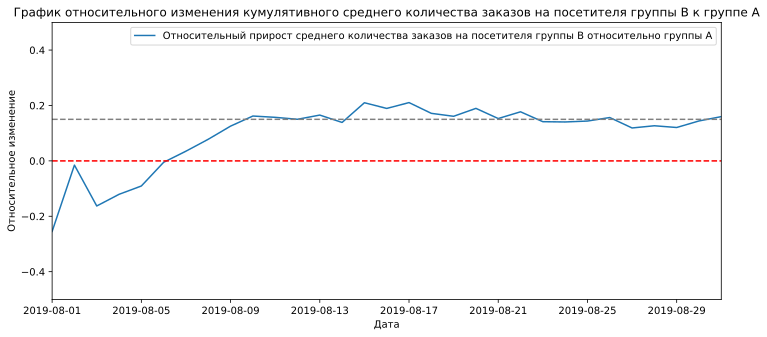

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.legend()

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.5, 0.5]);

Построили график относительного изменения кумулятивного среднего количества заказов на посетителя по группам. Почти с самого начала теста группа В лидирует по среднему количеству заказов на посетителя: становится лучше и лучше, и фиксируется около прироста в 15% относительно группы А.

### Построение точечного графика количества заказов по пользователям

In [27]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Получили число заказов по пользователям. Далее изучим гистограмму распределения количества заказов.

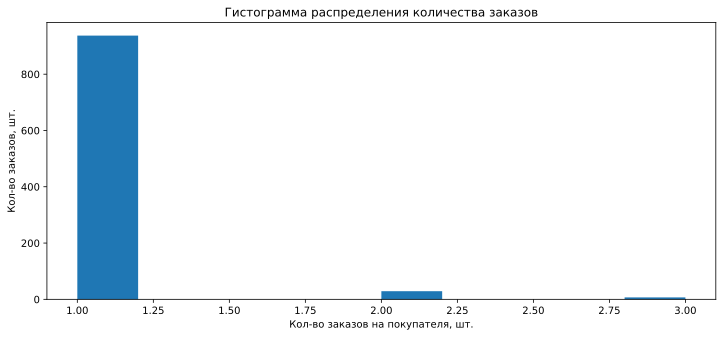

In [28]:
plt.title('Гистограмма распределения количества заказов')
plt.xlabel('Кол-во заказов на покупателя, шт.')
plt.ylabel('Кол-во заказов, шт.')

plt.hist(ordersByUsers['orders']);

Большинство пользователей совершило всего 1 заказ. Однако не ясно, сколько пользователей заказало 2 и более раз. Построим точечный график.

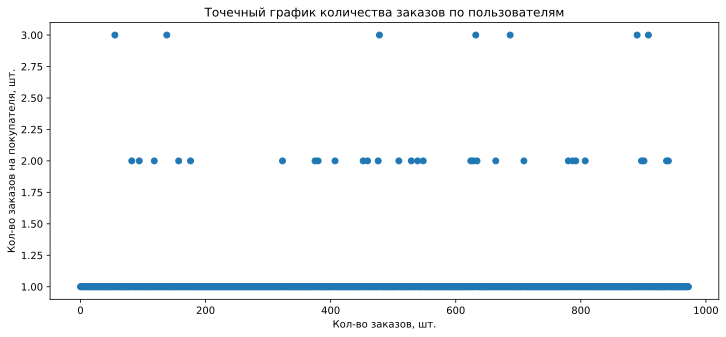

In [29]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Кол-во заказов, шт.')
plt.ylabel('Кол-во заказов на покупателя, шт.')

plt.scatter(x_values, ordersByUsers['orders']);

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными. 2 заказа — нормально или много? Ответим на этот вопрос, посчитав выборочные перцентили.

### Расчёт 95-го и 99-го перцентилей количества заказов на пользователя и определение аномальных пользователей

In [30]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили
abnormal_orders_count = np.percentile(ordersByUsers['orders'], [90, 95, 99])
print(abnormal_orders_count)

[1. 1. 2.]


Не более 5% пользователей совершили больше 1-го заказа. И не более 1% пользователей — больше 2-х заказов.
<br>В качестве выбросов возьмём пользователей, совершивших больше 2-х заказов.

### Построение точечного графика стоимостей заказов

Изучим гистограмму распределения стоимостей заказов.

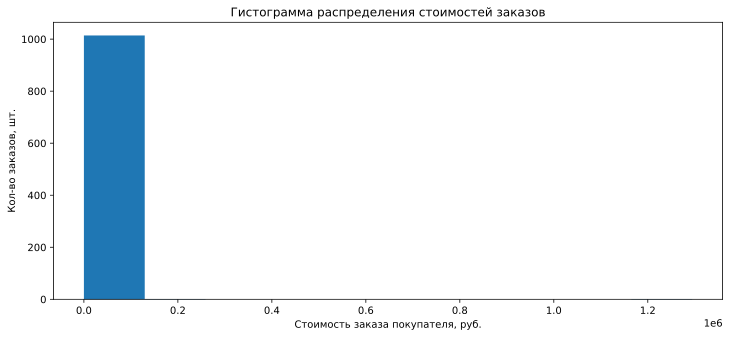

In [31]:
plt.title('Гистограмма распределения стоимостей заказов')
plt.xlabel('Стоимость заказа покупателя, руб.')
plt.ylabel('Кол-во заказов, шт.')

plt.hist(orders['revenue']);

Сумма большинства заказов меньше 200 000 рублей. Однако по гистограмме ничего не сказать о более дорогих, как и распределении более дешёвых. Кроме того, распределение стоимости заказов не нормальное. Попробуем другой вид графика.

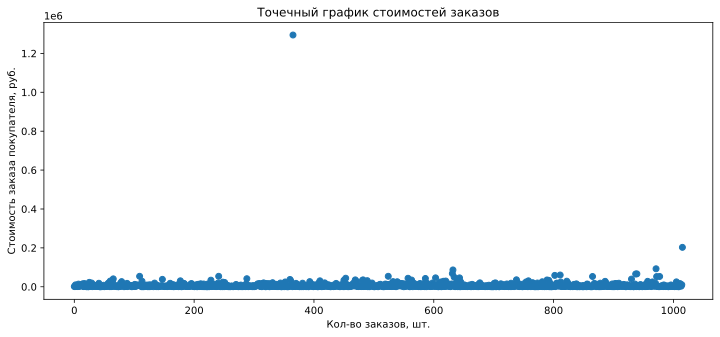

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Кол-во заказов, шт.')
plt.ylabel('Стоимость заказа покупателя, руб.')

plt.scatter(x_values, orders['revenue']);

По графику видно, что заказов стоимостью 200 000 рублей всего 2. Построим тот же самый график, но ограничим стоимость заказа.

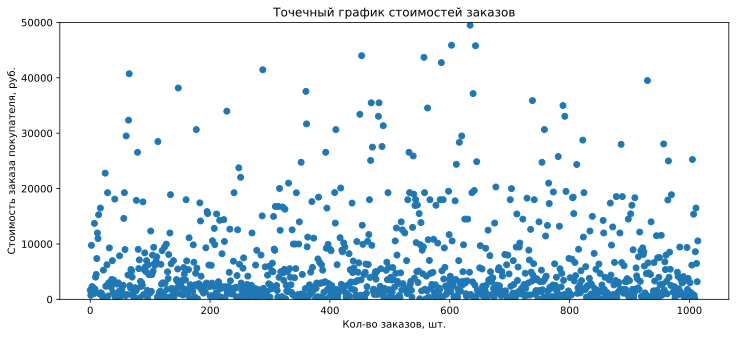

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.ylim(0, 50000) # ограничим стоимость заказа покупателя до 50 000 руб.
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Кол-во заказов, шт.')
plt.ylabel('Стоимость заказа покупателя, руб.')

plt.scatter(x_values, orders['revenue']);

По графику видно, что много заказов в диапазоне до 50 000 руб. Найдём выборочные перцентили.

### Расчёт 95-го и 99-го перцентилей стоимости заказов и определение аномальных заказов

In [34]:
abnormal_orders_revenue = np.percentile(orders['revenue'], [90, 95, 99])
print(abnormal_orders_revenue)

[17990. 26785. 53904.]


Не более, чем у 5% заказов чек дороже 26 785 рублей. И не больше, чем 1%
заказов - дороже 53 904 рублей.
Выберем в качестве выбросов заказы дороже 53 904 рублей.

### Проверка гипотез A/B-теста

#### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя по «сырым» данным — без удаления аномальных пользователей.

Зададим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет}\\
   H_1 :\text{Статистически значимые различия в среднем количестве заказов между группами по "сырым" данным есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$
<br>Посчитаем p-value, используя метод "stats.mannwhitneyu" из библиотеки "scipy" для сравнения средних двух выборок.
<br>Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу об отсутствии статистически значимых различий отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Метод, который будем применять для A/B-тестирования, называется stats.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»). 
<br>Ключевая идея — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки. Ранг — это место в упорядоченной выборке. Разница между рангами одних и тех же значений может быть одинакова, и такой сдвиг называют типичным. Значит, просто добавились значения, сдвинувшие все остальные. 
<br>А нетипичные сдвиги по рангу рассматриваются как изменения. Сумма рангов таких сдвигов и выступает значением критерия. Чем он выше — тем больше вероятность, что для этих выборок интересующая нас величина различается.
<br>Вероятности получения разных значений критерия Манна-Уитни рассчитаны теоретически, что даёт возможность делать вывод о различии или его отсутствии для любого заданного уровня значимости.

Объявим датафрейм date со столбцами
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Собрали все необходимые метрики в одну таблицу для дальнейшего анализа.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
<br> Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
<br>Переменная sampleA должна состоять из двух частей:
- Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders']
- Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])

<br>Список индексов создали функцией np.arange(). Она работает так же, как функция range(), только создаёт массив индексов в формате np.array, который требуется в pd.Series.
<br>В Pandas последовательности объединяют функцией pd.concat() (от англ. concatenate, «сцеплять»). Сперва ей передают то, что объединяют — в нашем случае список из первой и второй части.
<br>Дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): pd.concat([...], axis=0). То же делаем для sampleB и получаем.

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Напомним, что в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().

In [38]:
print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
'''Выведем относительный прирост среднего числа заказов группы B: 
   среднее число заказов группы B / среднее число заказов группы A - 1''' 
print('Относительный прирост среднего количества заказов:','{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01102
Относительный прирост среднего количества заказов: 0.160


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов на посетителя группы В к среднему количеству заказов на посетителя группы А равен 16%. Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.

#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.

Зададим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Статистически значимых различий в среднем чеке заказа на пользователя между группами по "сырым" данным нет}\\
   H_1 :\text{Статистически значимые различия в среднем чеке заказа на пользователя между группами по "сырым" данным есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$
<br>Посчитаем p-value, используя метод "stats.mannwhitneyu" из библиотеки "scipy" для сравнения средних двух выборок.
<br>Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу об отсутствии статистически значимых различий отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
<br>А ещё найдём относительные различия в среднем чеке между группами:

In [39]:
orders[orders['group']=='B']['revenue']

0         1650
1          730
3         9759
4         2308
5         2210
         ...  
1186     15380
1190      8600
1191     16490
1192      6490
1196    202740
Name: revenue, Length: 548, dtype: int64

In [40]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Относительное различие среднего чека: 0.287


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. В тоже время относительное различие среднего чека между сегментами целых 28,7%. Приступим к анализу аномалий.

#### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя по «очищенным» данным — с удалением аномальных пользователей.

Зададим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Статистически значимых различий в среднем количестве заказов между группами по "очищенным" данным нет}\\
   H_1 :\text{Статистически значимые различия в среднем количестве заказов между группами по "очищенным" данным есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$
<br>Посчитаем p-value, используя метод "stats.mannwhitneyu" из библиотеки "scipy" для сравнения средних двух выборок.
<br>Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу об отсутствии статистически значимых различий отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > abnormal_orders_count[2]]['visitorId'], # оставим только пользователей
        # с кол-во заказов больше 99 перцентиля в группе A
        ordersByUsersB[ordersByUsersB['orders'] > abnormal_orders_count[2]]['visitorId'], # оставим только пользователей
        # с кол-во заказов больше 99 перцентиля в группе B
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > abnormal_orders_revenue[2]]['visitorId'] # оставим только пользователей
        # со стоимостью заказов больше 99 перцентиля
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) # посчитаем количество аномальных пользователей

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64
16


Уберём пользователей, которые совершили более 2-х заказов, а также удалим пользователей с заказами дороже 53 904 руб. В итоге убрали 1% пользователей с наибольшим числом заказов и 1% пользователей с заказами с наибольшей стоимостью. Теперь у нас есть множество аномальных пользователей. После их удаления посчитаем статистическую значимость. Надо выяснить, есть ли существенные различия между группами с очищенными данными.

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00702
0.189


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «очищенных» данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов на посетителя группы В к среднему количеству заказов на посетителя группы А равен 18,9%. Сегмент В значительно лучше сегмента А.

#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа на пользователя между группами по «очищенным» данным — с удалением аномальных пользователей.

Зададим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Статистически значимых различий в среднем чеке заказа на пользователя между группами по "очищенным" данным нет}\\
   H_1 :\text{Статистически значимые различия в среднем чеке заказа на пользователя между группами по "очищенным" данным есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$
<br>Посчитаем p-value, используя метод "stats.mannwhitneyu" из библиотеки "scipy" для сравнения средних двух выборок.
<br>Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу об отсутствии статистически значимых различий отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [43]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.788
-0.032


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами после удаления аномальных пользователей стало всего 3,2%.

### Принятие решения по результатам A/B-теста

- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий
- Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий
- График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо фиксации около среднего значения
- График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя

<br><b>В итоге:</b>
1. Нужно остановить A/B-тест различий по среднему количеству заказов на посетителя между группами, признать его успешным и перейти к проверке следующей гипотезы.
2. Следует остановить A/B-тест различий по среднему чеку между группами, признать его неудачным и перейти к проверке следующей гипотезы.

# Вывод

Было проведено исследование, в результате которого приоритизировали гипотезы, запустили A/B-тест и проанализировали результаты. 
<br>Заказчик — отдел маркетинга крупного интернет-магазина
<br>Входные данные от компании — таблица с гипотезами, таблица с заказами и посетителями сайта
<br>В итоге были выявлены следующие проблемы в данных: неверные типы данных и аномалии в таблицах с заказами и посетителями сайта. Неверные типы данных исправлены на корректные.
<br>При дальнейшей работе с данными заказчику стоит проводить предобработку данных, т.е. выявлять и устранять или предотвращать аномалии и неверные типы данных.

<br>Проведён анализ в результате которого были сформулированы следующие выводы:
1. Будем использовать приоритизацию фреймворком "RICE", так как он учитывает большее количество параметров сравнения гипотез
2. В первую очередь проверим гипотезу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Далее "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
3. Нужно остановить A/B-тест различий по среднему количеству заказов на посетителя между группами, признать его успешным и перейти к проверке следующей гипотезы
4. Следует остановить A/B-тест различий по среднему чеку между группами, признать его неудачным и перейти к проверке следующей гипотезы

<br>Результаты проверки поставленных гипотез:
1. Гипотезу о том, что различий в среднем количестве заказов между группами нет отвергаем, и можем предположить, что различия есть
2. Гипотезу о том, что различий в среднем чеке между группами нет отвергнуть нельзя